# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Solana price analysis: SOL/USD expected to go back to $200.   TL; DR Breakdown Solana five-day price analysis chart suggests that the market is generally bullish.Our daily Solana price analysis is bullish.The cryptocurrency heat map has mixed results. Solana price analysis: General price overview Solana&#8217;s five-day price analysis chart suggests that the market is generally bullish, with most candlesticks red. The bulls were so powerful that the bears attempted to drag them down. Solana began her price analysis chart with a positive trend. The bulls controlled the market, pushing prices up in a cup and handle pattern that took them to intraday highs of $174.56. The bears erected a powerful barrier at the intraday highs, causing a falling price in a descending triangle. Buyers established numerous support levels. However, the fierce bears outmaneuvered them. The bearish trend persisted until the price reached its lowest point of the day, at $163, where buyers marshaled their dispersed strength to halt the slide. Today’s Solana price analysis shows that SOL/USD is bearish. Today the coin is trading at a low of $152. This follows a successful week during which the value rose to $220 and then corrected to $170 during yesterday’s session. We expect the coin to begin an upward momentum as the bull’s eye $180 mark. Our daily Solana price analysis is bullish, as the market rebounded from the lower Bollinger Band and tested $152.5 support following a bearish weekend, indicating that we are o... ... [| Skaityti daugiau](https://api.follow.it/track-rss-story-click/v3/tHfgumto13BQG-vwHrcBnrG7Iy_4u0x9) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Manitoba Conservative candidate Ted Falk apologizes for vaccine misinformation | CBC News.  Manitoba federal Conservative candidate Ted Falk is apologizing after he was quoted in a local newspaper spreading misinformation about the dangers of COVID-19 vaccines, suggesting they may do more harm than good. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/manitoba/manitoba-cpc-ted-falk-covid-19-vaccine-misinformation-1.6175925) 

### Kainų kaita pandemijos metu

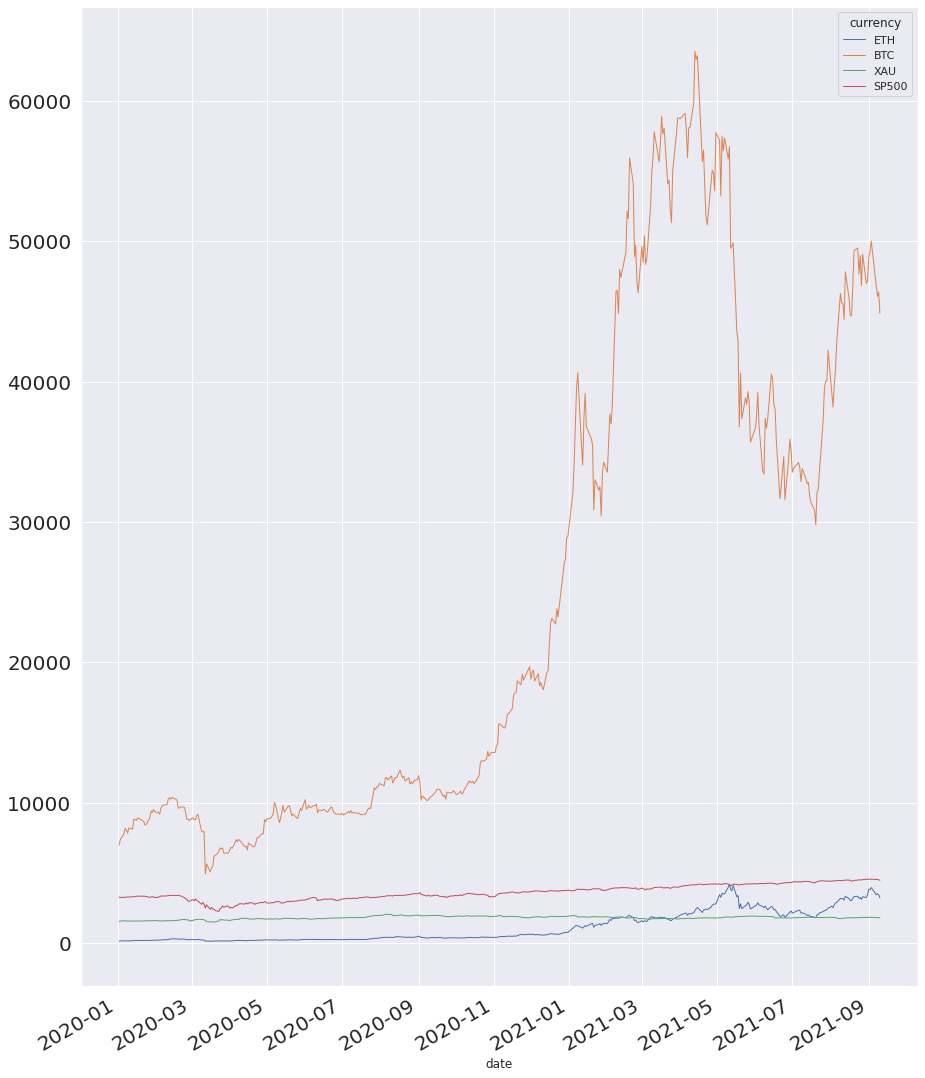

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.885360,0.185637,0.885954
BTC,0.885360,1.000000,0.139982,0.838247
XAU,0.185637,0.139982,1.000000,0.350453
SP500,0.885954,0.838247,0.350453,1.000000


In [8]:
#hide ### Koreliacijos matrica.

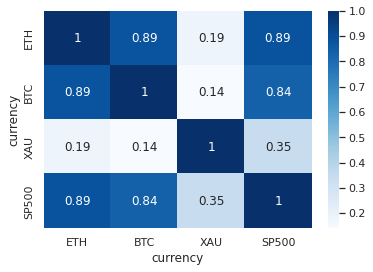

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')